#  Chapter 20: Regression Machine Learning Case Study Project



---

##  Chapter Objectives

By the end of this case study, you will know how to:

-  Work through a regression predictive modeling problem **end-to-end**.
-  Use **data transformations** to improve model performance.
-  Apply **algorithm tuning** to boost accuracy.
-  Use **ensemble methods** and tune them for further performance gains.

---

##  What You Will Do in This Project

In this hands-on regression project, you will:

1. **Load and explore the dataset**
   - Understand the target and input variables
   - Check data types, missing values, distributions

2. **Prepare the data**
   - Handle missing values
   - Perform feature selection or engineering
   - Apply transformations (e.g., scaling, normalization, log transform)

3. **Evaluate machine learning algorithms**
   - Test multiple regression models (e.g., Linear, Ridge, Lasso, k-NN, CART)
   - Use cross-validation and proper evaluation metrics (like RMSE or MAE)

4. **Improve results**
   - Use **algorithm tuning** (e.g., GridSearchCV, RandomizedSearchCV)
   - Apply **ensemble methods** (e.g., Bagging, Boosting, Stacking)

5. **Finalize the model**
   - Retrain the best model on the full training set
   - Make predictions on unseen data
   - Save the model for future use

---

##  Key Techniques You’ll Practice

- Data Cleaning and Preprocessing  
- Data Visualization (optional but helpful)  
- Regression Algorithms Comparison  
- Hyperparameter Tuning  
- Ensemble Learning  
- Model Finalization and Saving

---


##  Tip

Use the **6-step ML project template** from Chapter 18 as your guide:
1. Define Problem
2. Summarize Data
3. Prepare Data
4. Evaluate Algorithms
5. Improve Results
6. Present/Finalize Results

---



In [568]:
#Project 2 (Baseline model)
# Load libraries

import numpy 
import numpy as np
import pandas as pd
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix

from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression #Linear
from sklearn.linear_model import Lasso #Linear
from sklearn.linear_model import ElasticNet #Linear

from sklearn.tree import DecisionTreeRegressor #Non-linear
from sklearn.neighbors import KNeighborsRegressor #Non-linear
from sklearn.svm import SVR #Non-linear

from sklearn.ensemble import RandomForestRegressor #Ensemble
from sklearn.ensemble import GradientBoostingRegressor #Ensemble
from sklearn.ensemble import ExtraTreesRegressor #Ensemble
from sklearn.ensemble import AdaBoostRegressor #Ensemble



# #-- Load dataset
# filename = 'housing.csv'
# df = read_csv(filename)

import pandas as pd

# Load dataset
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(filename, sep='\\s+', names=names)

In [569]:
#-- Peek at the Data

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,6.32e-03,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296.0,15.3,396.90,4.98,24.0
1,2.73e-02,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242.0,17.8,396.90,9.14,21.6
2,2.73e-02,0.0,7.07,0,0.47,7.18,61.1,4.97,2,242.0,17.8,392.83,4.03,34.7
3,3.24e-02,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222.0,18.7,394.63,2.94,33.4
4,6.91e-02,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222.0,18.7,396.90,5.33,36.2


In [570]:
#-- Dimensions of Dataset

df.shape

(506, 14)

In [571]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [572]:
#-- descriptions

set_option('display.precision', 1)
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.1e+02,506.0,506.0,5.1e+02,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6e+00,11.4,11.1,6.9e-02,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7,22.5
std,8.6e+00,23.3,6.9,2.5e-01,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1,9.2
min,6.3e-03,0.0,0.5,0.0e+00,0.4,3.6,2.9,1.1,1.0,187.0,12.6,0.3,1.7,5.0
25%,8.2e-02,0.0,5.2,0.0e+00,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,6.9,17.0
50%,2.6e-01,0.0,9.7,0.0e+00,0.5,6.2,77.5,3.2,5.0,330.0,19.1,391.4,11.4,21.2
75%,3.7e+00,12.5,18.1,0.0e+00,0.6,6.6,94.1,5.2,24.0,666.0,20.2,396.2,17.0,25.0
max,8.9e+01,100.0,27.7,1.0e+00,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,38.0,50.0


In [573]:
#-- correlation

set_option('display.precision', 2)
df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-5.59e-02,0.42,-0.22,0.35,-0.38,6.26e-01,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54,-0.47


### Unimodal Data Visualizations

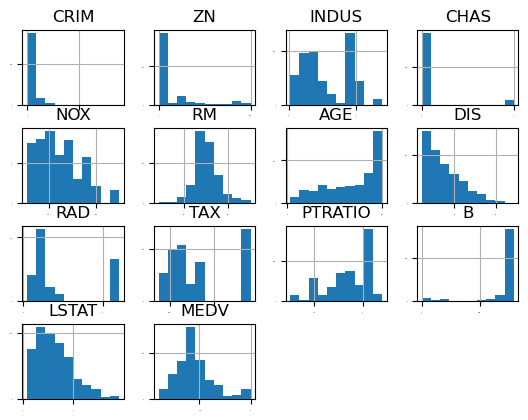

In [575]:
#-- histograms

df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

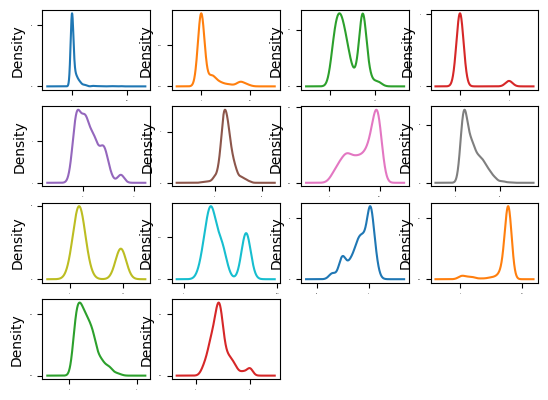

In [576]:
#-- density

df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False,fontsize=1)
pyplot.show()

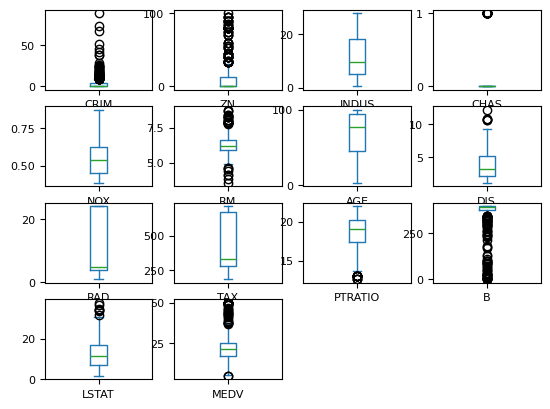

In [577]:
# -- box and whisker plots

df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=8)
pyplot.show()

### Multimodal Data Visualizations


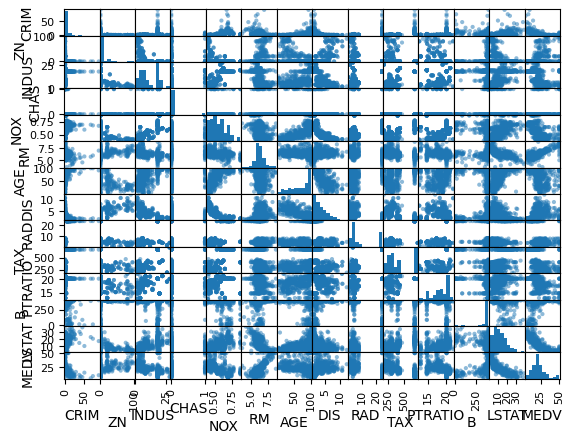

In [579]:
#-- scatter plot matrix

scatter_matrix(df)
pyplot.show()

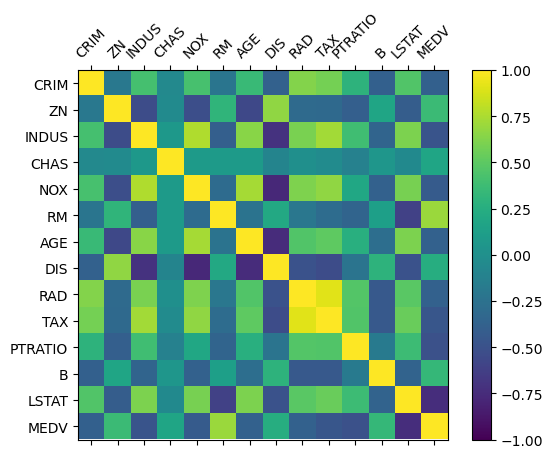

In [580]:
#-- correlation matrix

fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0, len(df.columns), 1) 
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns, rotation=45)  
ax.set_yticklabels(df.columns)
pyplot.show()

## Validation Dataset


In [582]:
#-- Split-out validation dataset

array = df.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=validation_size)

## Evaluate Algorithms: Baseline

In [584]:
#-- Test options and evaluation metric

num_folds = 10
scoring = 'neg_mean_squared_error'

#-- Spot-Check Algorithms

models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

#print(models)

#-- evaluate each model in turn

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(name, cv_results.mean())

LR -21.875013403337118
LASSO -26.5185495502298
EN -26.5014327477868
KNN -41.37796341463415
CART -21.365941463414636
SVR -63.35940852548083


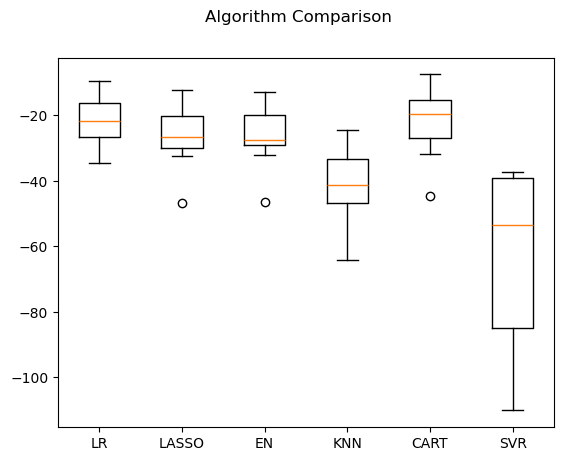

In [585]:
#-- Compare Algorithms

fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Evaluate Algorithms: Standardization

In [587]:
# Load dataset
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(filename, sep='\\s+', names=names)

#-- Split-out validation dataset
array = df.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=validation_size)

#-- Test options and evaluation metric
num_folds = 10
scoring = 'neg_mean_squared_error'

#-- Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))

#print(pipelines)

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(name, cv_results.mean())

ScaledLR -23.56624316990038
ScaledLASSO -30.061476411963724
ScaledEN -31.266538826055722
ScaledKNN -22.45247058536585
ScaledCART -22.977504268292684
ScaledSVR -31.142301506899894


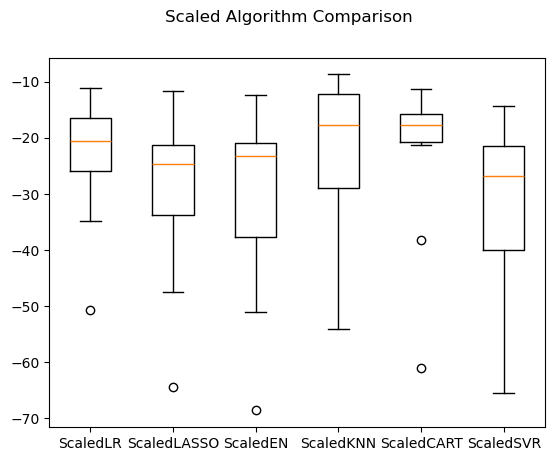

In [588]:
#-- Compare Algorithms

fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Improve Results With Tuning

In [590]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print(mean, param)

Best: -19.730202 using {'n_neighbors': 3}
-25.515015243902432 {'n_neighbors': 1}
-19.730202303523036 {'n_neighbors': 3}
-22.230039951219517 {'n_neighbors': 5}
-23.889733038825288 {'n_neighbors': 7}
-23.65333495934959 {'n_neighbors': 9}
-23.44992115500907 {'n_neighbors': 11}
-24.196324700533985 {'n_neighbors': 13}
-24.370929279132795 {'n_neighbors': 15}
-25.366524662418772 {'n_neighbors': 17}
-25.87041069691237 {'n_neighbors': 19}
-26.851920477296613 {'n_neighbors': 21}


## Ensemble Methods

In [592]:
#-- ensembles

ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))

results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(name, cv_results.mean())

ScaledAB -14.003361091024791
ScaledGBM -8.999469495694992
ScaledRF -10.987436819329268
ScaledET -10.972009179024386


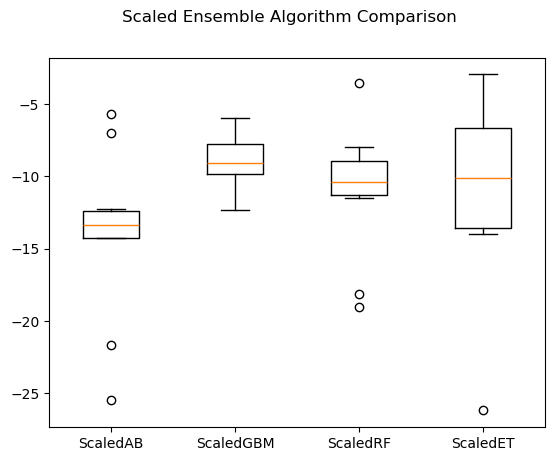

In [593]:
#-- Compare Algorithms

fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Tune Ensemble Methods


In [595]:
#-- Test options and evaluation metric

num_folds = 10
scoring = 'neg_mean_squared_error'

# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print(mean, param)

Best: -8.811504 using {'n_estimators': 200}
-9.457263825314941 {'n_estimators': 50}
-8.90004725813326 {'n_estimators': 100}
-8.862655120081037 {'n_estimators': 150}
-8.811503950787166 {'n_estimators': 200}
-8.928203281471678 {'n_estimators': 250}
-9.10109139384124 {'n_estimators': 300}
-9.065063319008479 {'n_estimators': 350}
-9.03494404244846 {'n_estimators': 400}


## Finalize Model

In [597]:
#-- prepare the model

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(n_estimators=250)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(n_estimators=250)

In [598]:
#-- transform the validation dataset

scaler = StandardScaler().fit(X_train)
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

6.8504810598583825
